In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path1=os.getcwd()


In [2]:
#Loading the data
path=path1+'/file/Train.csv'
data=pd.read_csv(path)

# Calculation of distance from Manhattan city center to all the properties and their distribution

In [3]:
dr2=data[['latitude','longitude']]
dr3=dr2.to_numpy()

import math
dr5=dr3*math.pi/180

dr4=dr3*math.pi/180
#dr4 Distance is calculated from the Manhattan city center (taken from google)
dr4[:,0] -= 40.7831*math.pi/180
dlat=dr4[:,0]
dlon=dr4[:,1]

dlon -= -73.9712*math.pi/180

a=[]
for i in range(len(dr3)):
    a.append(math.sin(dlat[i]/2)**2+math.cos(dr5[i][0])*math.cos(40.7831*math.pi/180)*math.sin(dlon[i]/2)**2)
    
c=[]
for i in range(len(dr3)):
    c.append(math.atan2(math.sqrt(a[i]),math.sqrt(1-a[i])))
    
d=[]
for i in range(len(dr3)):
    d.append(6373.0*c[i]*1000)
    
    
data['Distance in m']= d

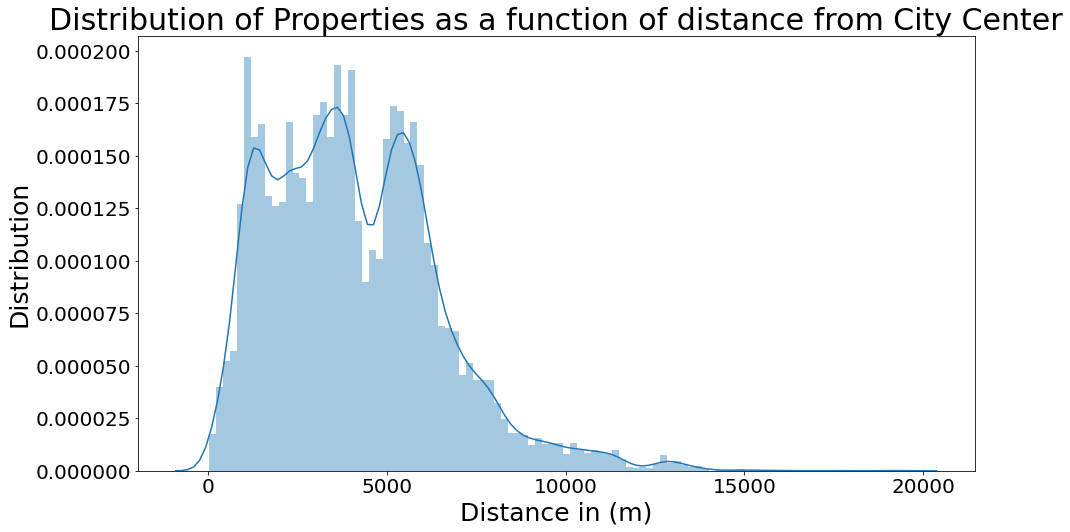

In [4]:
figure =plt.figure(figsize=(15,8))
sns.distplot(data['Distance in m'],bins=100)
plt.title('Distribution of Properties as a function of distance from City Center', fontsize=30)
plt.xlabel('Distance in (m)',fontsize=25)
plt.ylabel('Distribution',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Box plot of the price for different neighbourhood_group

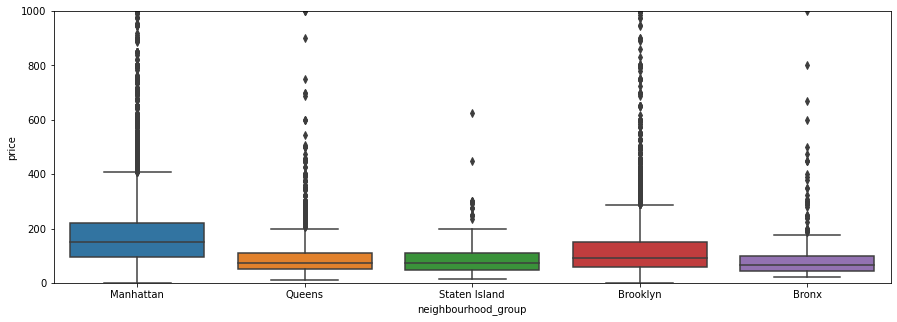

In [5]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
plt.ylim(0,1000)
sns.boxplot(x='neighbourhood_group',y='price',data=data)
plt
plt.show()

# Price variation for different room-type

In [6]:
data.groupby(data['room_type']).price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,17829.0,213.175613,296.632732,0.0,120.0,160.0,229.0,10000.0
Private room,15594.0,89.420482,142.008309,0.0,50.0,70.0,95.0,9999.0
Shared room,803.0,72.115816,112.527260,0.0,33.0,45.0,75.0,1800.0


# Removing some outliers and preparing x_train and y_train data

In [98]:
#D1=data[(data['price'] >= 10)&(data['price'] <= 1500)&(data['neighbourhood_group']=='Manhattan')&(data['room_type']=='Private room')]
D1=data[(data['price'] >= 30)&(data['price'] <= 350)&(data['Distance in m'] <= 10000)]
D1.groupby(D1['room_type']).price.describe()
D2=np.log(D1['Distance in m'])
D1['Distance in m new']=D2
D1.head(10)
#D1.head(10)
#df_filtered = df[df['Age'] >= 25] 
#X=data.drop[('id','neighbourhood_group')]


<ipython-input-98-8ebbaecda58f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['Distance in m new']=D2


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Distance in m,Distance in m new
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0,3531.592026,8.169504
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365,3625.877178,8.195852
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365,1928.404038,7.564448
5,9944426,Lower Manhattan Luxury,51105827,Dax,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,225,90,1,2016-03-18,0.02,1,362,4380.596617,8.384940
7,22368751,Bright Luxury Apartment with Amazing View of City,20800727,Amirhos,Brooklyn,Fort Greene,40.69064,-73.97898,Entire home/apt,200,5,0,NaN,NaN,1,0,5152.596065,8.547256
9,12705519,Heights Haven,1372942,Drew,Manhattan,Washington Heights,40.83170,-73.94290,Entire home/apt,180,30,6,2017-06-24,0.15,1,0,2953.775603,7.990839
10,4823959,Private room for 2 in cool BK apt,24633966,Phil,Brooklyn,Kensington,40.64469,-73.97086,Private room,50,14,0,NaN,NaN,1,0,7697.673952,8.948673
11,20817201,Private Room in Trendy Williamsburg Loft,643120,Sam,Brooklyn,Williamsburg,40.71591,-73.95513,Private room,50,4,56,2019-06-20,2.53,4,8,3797.609601,8.242127
12,13387453,"Cute, clean studio in Central Harlem",23273780,Rahel,Manhattan,Harlem,40.81619,-73.93798,Entire home/apt,77,1,2,2016-07-06,0.05,1,0,2311.430675,7.745622
14,5040218,LUX Blg-Prime Area! Lg PRIVATE RM & BATH w/VIEWS!,26019828,Sonia,Manhattan,Hell's Kitchen,40.76159,-73.99824,Private room,69,2,22,2019-03-20,0.64,2,7,1651.692924,7.409556


In [121]:
X=D1[['neighbourhood_group','latitude','longitude','room_type','Distance in m']]
Y=D1['price']
Y=np.log(Y)
X.head()



,neighbourhood_group,latitude,longitude,room_type,Distance in m
0,Manhattan,40.72217,-73.99481,Private room,3531.592026
2,Queens,40.75558,-73.89316,Entire home/apt,3625.877178
4,Manhattan,40.81022,-73.94266,Shared room,1928.404038
5,Manhattan,40.71192,-74.01572,Entire home/apt,4380.596617
7,Brooklyn,40.69064,-73.97898,Entire home/apt,5152.596065


In [122]:
col = X.room_type
col.head()

coln =[]

for rmtype in col:
    if(rmtype=='Private room'):
        coln.append(1)
    if(rmtype=='Entire home/apt'):
        coln.append(2)
    if(rmtype=='Shared room'):
        coln.append(3)
        
X["room_type_new"]=coln

X.head()

col1 = X.neighbourhood_group
col1.head()

coln1 =[]

for nghood in col1:
    if(nghood=='Manhattan'):
        coln1.append(1)
    if(nghood=='Brooklyn'):
        coln1.append(2)
    if(nghood=='Bronx'):
        coln1.append(3)
    if(nghood=='Queens'):
        coln1.append(4)
    if(nghood=='Staten Island'):
        coln1.append(5)    
X["room_type_new"]=coln
X['Neighbourhood_new']=coln1
X.head()

<ipython-input-122-ce9ae6f366b1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["room_type_new"]=coln
<ipython-input-122-ce9ae6f366b1>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["room_type_new"]=coln
<ipython-input-122-ce9ae6f366b1>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,neighbourhood_group,latitude,longitude,room_type,Distance in m,room_type_new,Neighbourhood_new
0,Manhattan,40.72217,-73.99481,Private room,3531.592026,1,1
2,Queens,40.75558,-73.89316,Entire home/apt,3625.877178,2,4
4,Manhattan,40.81022,-73.94266,Shared room,1928.404038,3,1
5,Manhattan,40.71192,-74.01572,Entire home/apt,4380.596617,2,1
7,Brooklyn,40.69064,-73.97898,Entire home/apt,5152.596065,2,2


In [123]:
Xn=X[['longitude','Neighbourhood_new','latitude','room_type_new','Distance in m']]
Xn.shape
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[0])],remainder='passthrough') 
  
#data = np.array(columnTransformer.fit_transform(data), dtype = np.str) 

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xn,Y,test_size=0.2, random_state=10)

In [125]:
from sklearn.linear_model import LinearRegression
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.40060471164839484

In [126]:
Xn.corr()

,longitude,Neighbourhood_new,latitude,room_type_new,Distance in m
longitude,1.000000,0.657873,0.126254,-0.176459,0.327935
Neighbourhood_new,0.657873,1.000000,-0.229824,-0.133744,0.472032
latitude,0.126254,-0.229824,1.000000,-0.001863,-0.700597
room_type_new,-0.176459,-0.133744,-0.001863,1.000000,-0.110625
Distance in m,0.327935,0.472032,-0.700597,-0.110625,1.000000


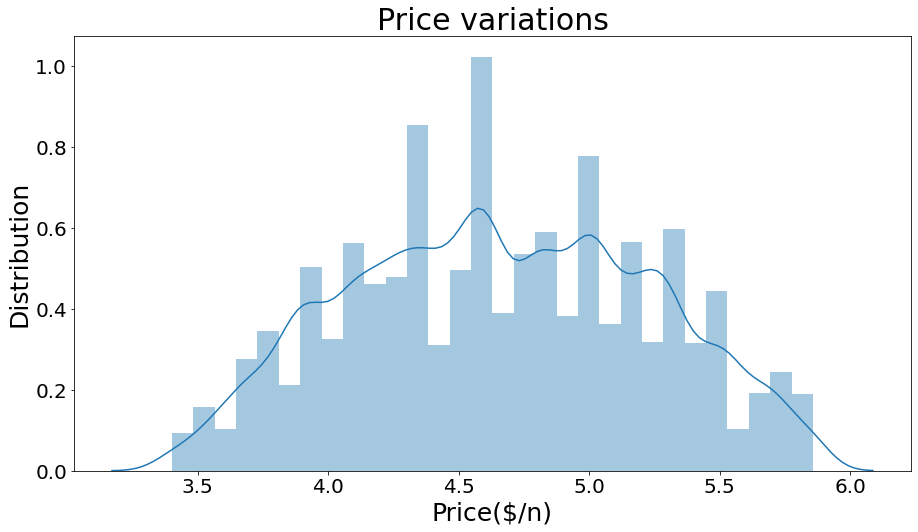

In [127]:
figure =plt.figure(figsize=(15,8))
sns.distplot(Y,bins=30)
plt.title('Price variations', fontsize=30)
plt.xlabel('Price($/n)',fontsize=25)
plt.ylabel('Distribution',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()